In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from utils.face_functions import face_to_vec

In [2]:
IMG_PATH = '../../images2/'
TEST_IMG_PATH = '../../test_photos/'
TEST_DF_FILE = 'test_faces_df.pkl'
DF_FILE = 'faces_df.pkl'

### Zdjęcia aktorów

In [3]:
if os.path.exists(DF_FILE):
    faces_df = pd.read_pickle(DF_FILE)
else:
    photo_files = os.listdir(IMG_PATH)
    people_df = pd.DataFrame({"files": photo_files})
    people_df["person"] = people_df.files.str.slice(0, -6).astype('catogory')
    people_df.set_index('person', inplace=True)
    people_df['code'] = people_df.files.apply(lambda img: face_to_vec(os.path.join(IMG_PATH, img)))
    codes = pd.DataFrame(np.vstack(people_df.code.values), index=people_df.index).add_prefix('v_')
    faces_df = pd.concat([people_df, codes], axis=1).drop(['code', 'files'], axis=1)
    faces_df.to_pickle(DF_FILE)

### Zdjęcia z kamerki

In [4]:
if os.path.exists(TEST_DF_FILE):
    test_faces_df = pd.read_pickle(TEST_DF_FILE)
else:
    photo_files = os.listdir(TEST_IMG_PATH)
    people_df = pd.DataFrame({"files": photo_files})
    people_df["person"] = people_df.files.str.slice(0, -6).astype('category')
    people_df.set_index('person', inplace=True)
    people_df['code'] = people_df.files.apply(lambda img: face_to_vec(os.path.join(TEST_IMG_PATH, img)))
    codes = pd.DataFrame(np.vstack(people_df.code.values), index=people_df.index).add_prefix('v_')
    test_faces_df = pd.concat([people_df, codes], axis=1).drop(['code', 'files'], axis=1)
    test_faces_df.to_pickle(TEST_DF_FILE)

In [5]:
photo_count = faces_df.groupby(faces_df.index).count().sort_values('v_0', ascending=False).v_0
(photo_count > 1).sum()

292

In [6]:
photo_count.shape

(765,)

Czy na pewno nie możemy mieć większej ilości zdjęć? Dla osób z małą ilością zdjęć.

In [7]:
faces_df.head()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_118,v_119,v_120,v_121,v_122,v_123,v_124,v_125,v_126,v_127
person,,,,,,,,,,,,,,,,,,,,,
Martin Freeman,-0.050439,0.119744,-0.046620,-0.049049,-0.022071,0.040160,-0.049325,-0.110827,0.165672,-0.069824,...,0.015431,0.060153,-0.153189,-0.033877,-0.240369,-0.077580,0.059311,-0.004433,0.098113,0.033570
Amy Adams,-0.038818,0.073350,0.067326,-0.102561,-0.104552,0.095204,-0.112648,-0.104214,0.182455,-0.089285,...,-0.090234,0.142172,-0.039201,-0.074116,-0.163919,-0.049560,0.028586,0.035678,-0.043674,0.085356
Mieczysław Kasprzak,-0.127743,0.014230,0.017270,-0.051448,-0.057756,-0.107692,0.053714,-0.119901,0.144304,-0.067729,...,0.026234,0.070549,-0.086549,0.100098,-0.122907,-0.060124,-0.068885,0.082728,0.062050,0.064192
Kathy Bates,-0.113299,0.036529,0.070375,-0.001606,-0.144225,-0.032016,-0.021404,-0.189453,0.163172,-0.086521,...,-0.065770,0.095919,-0.076526,-0.103842,-0.139216,-0.092137,0.053982,-0.022113,0.041640,0.090318
Jason Statham,-0.120364,0.106425,-0.002056,-0.058569,-0.103650,0.075094,-0.001968,-0.059791,0.195049,-0.053667,...,0.014751,0.080126,-0.023331,0.080263,-0.176287,-0.130813,-0.001468,-0.112890,0.011167,0.091414


In [8]:
faces_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2558 entries, Martin Freeman to Winona Ryder
Columns: 128 entries, v_0 to v_127
dtypes: float64(128)
memory usage: 2.5 MB


## Wybór 50 aktorów z najwiekszą ilością zdjęć

In [34]:
top_actors = photo_count[:50].index
top_faces = faces_df.loc[top_actors, 'v_0':]

## PCA

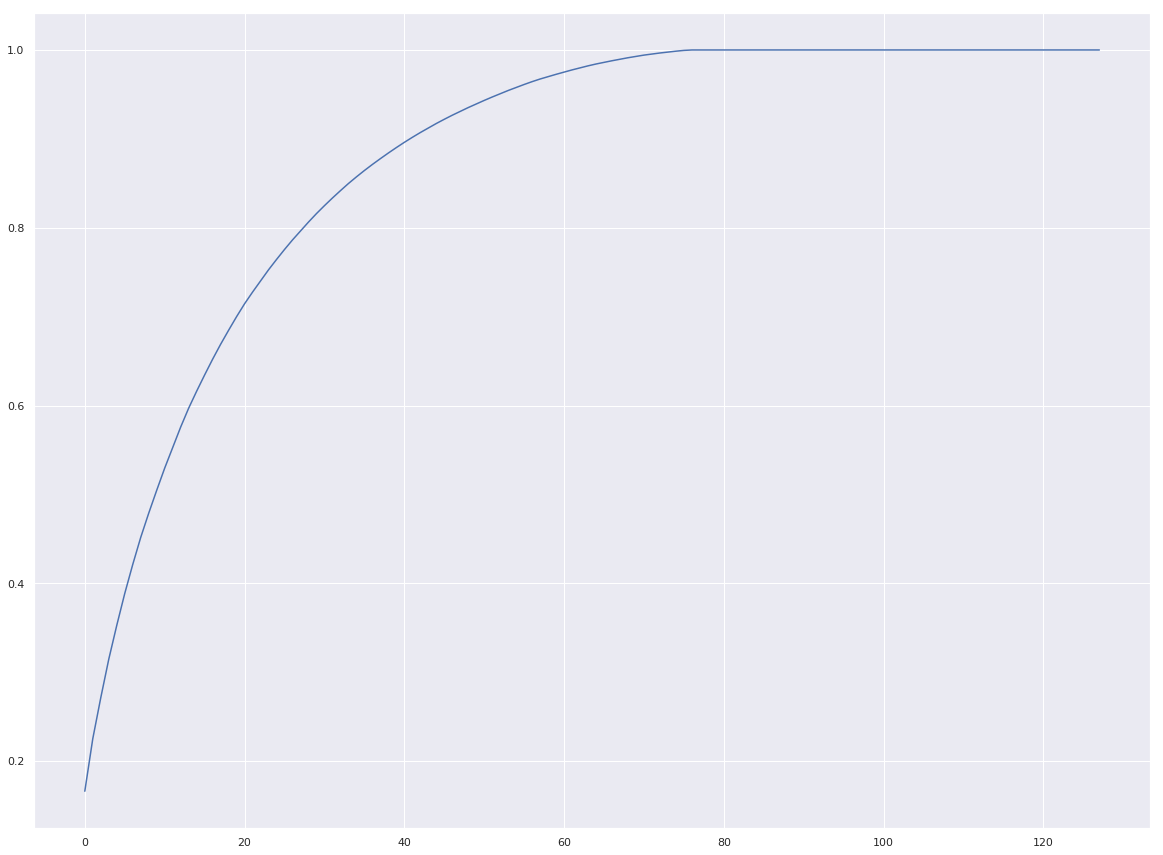

In [27]:
pca = PCA()
faces_components = pca.fit_transform(top_faces)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

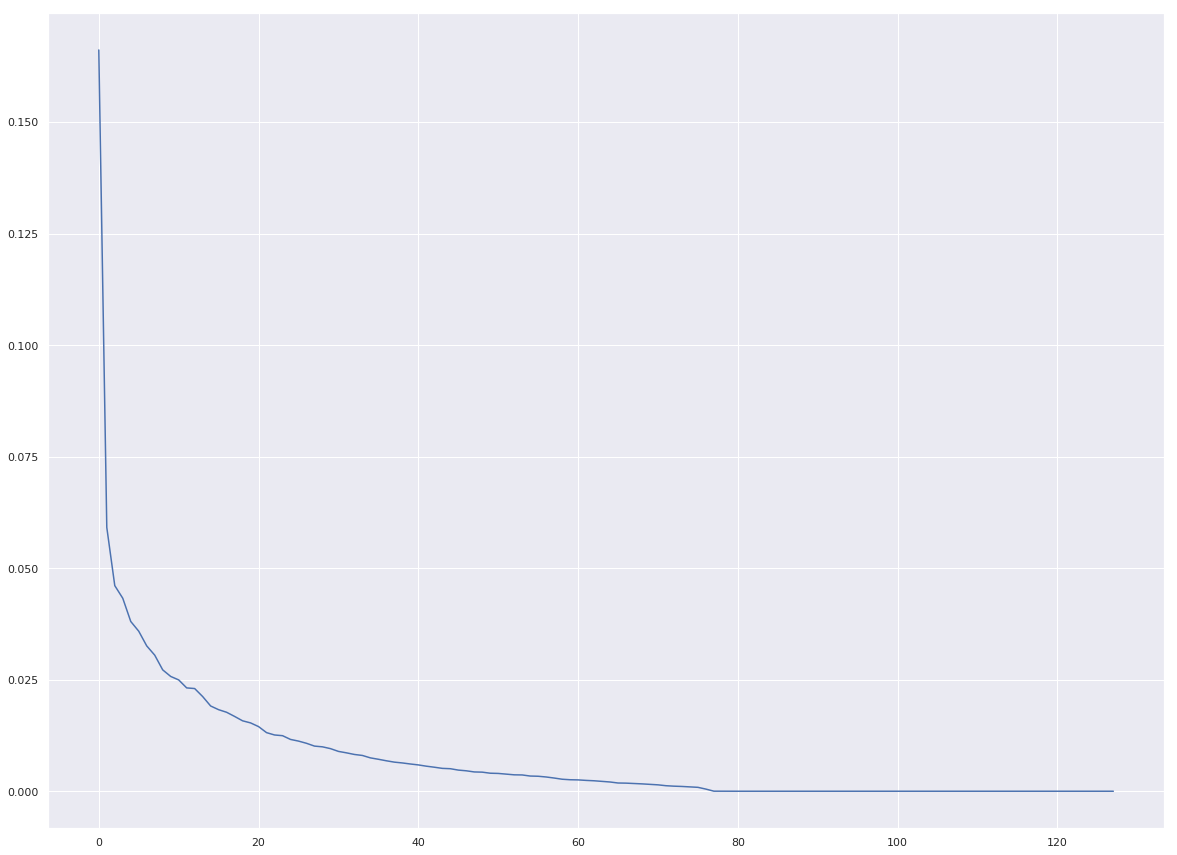

In [28]:
plt.plot(pca.explained_variance_ratio_)

In [29]:
# taka ciekawostka jak można sobie rozpakować np.ndarray do pd.Dataframe
# top_faces['pca_0'], top_faces['pca_1'] = np.split(faces_components[:, :2], 2, 1)

In [30]:
test_faces_components = test_pca.transform(test_faces_df)
test_top_pca = pd.DataFrame(test_faces_components[:, :2], index=test_faces_df.index, ).add_prefix('pca_').reset_index()
test_top_pca.person = test_top_pca.person.astype('object')
test_top_pca['test'] = True

top_pca = pd.DataFrame(faces_components[:, :2], index=top_faces.index, ).add_prefix('pca_').reset_index()
top_pca.person = top_pca.person.astype('object')
top_pca['test'] = False

top_pca = pd.concat([top_pca, test_top_pca])

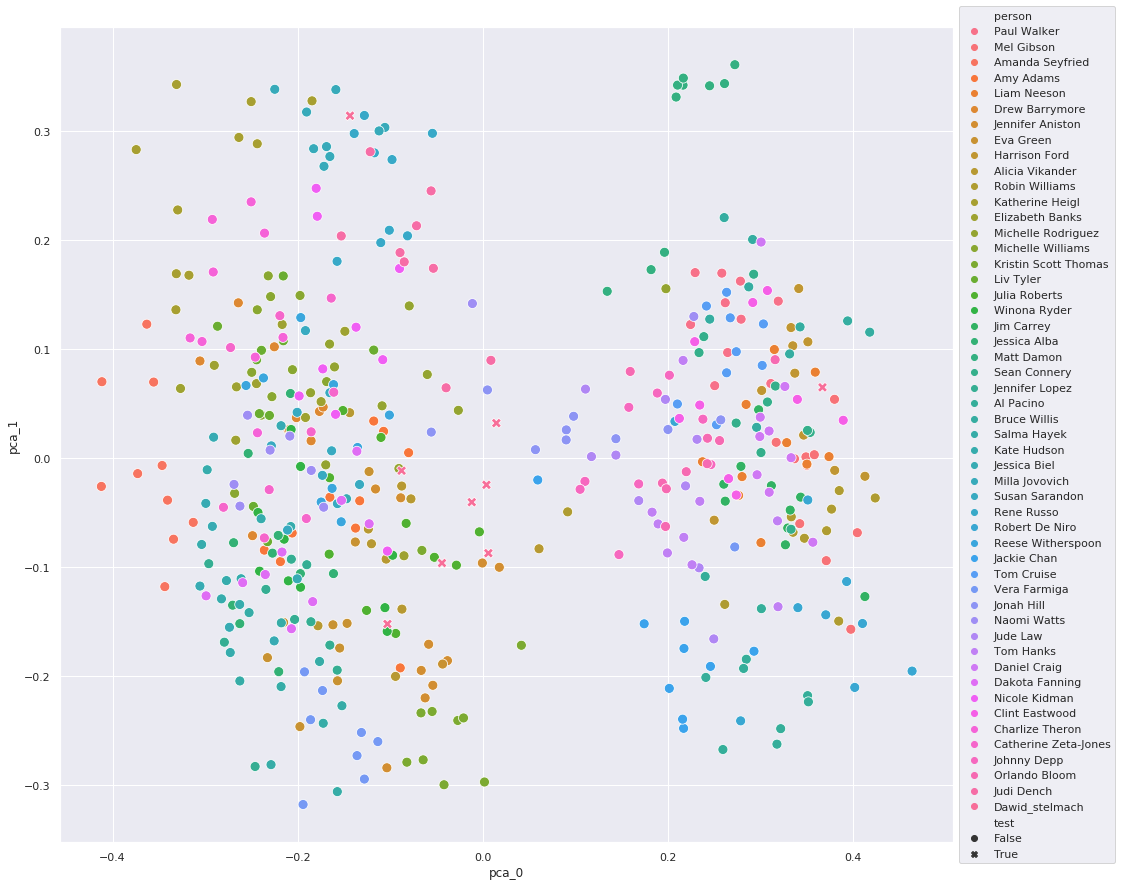

In [31]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=top_pca, x='pca_0', y='pca_1', hue='person', s=100, style='test')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## UMAP

In [15]:
import umap

In [16]:
reducer = umap.UMAP(random_state=113)

In [17]:
umap_components = reducer.fit_transform(top_faces)

In [18]:
top_umap = pd.DataFrame(umap_components, index=top_faces.index, ).add_prefix('umap_').reset_index()
top_umap.person = top_umap.person.astype('object')

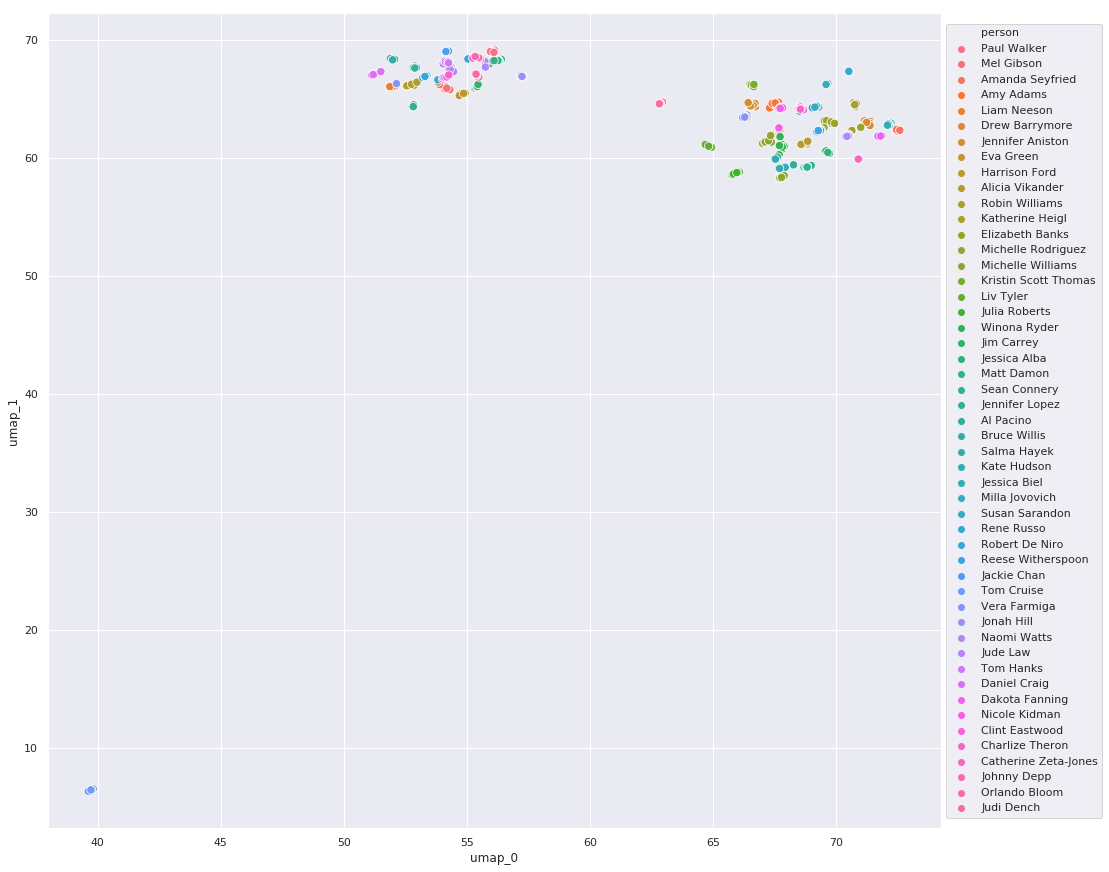

In [19]:
ax = sns.scatterplot(data=top_umap, x='umap_0', y='umap_1', hue='person', s=70)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Wyniki są raczej niezadowalające, przynajmniej jeśli chodzi nam o stabilność. Żeby zrobić to stabilniej trzeba by było spróbować nauczyć sieć konkretnie na tych twarzach, ale mamy mało danych. Można spróbowac dotrenowania gotowego modelu (taki upośledzony transfer leraning)

In [15]:
pca = PCA()
faces_components = pca.fit_transform(top_faces)
top_pca = pd.DataFrame(faces_components[:, :2], index=top_faces.index, ).add_prefix('pca_').reset_index()
top_pca.person = top_pca.person.astype('object')
# top_pca['test'] = False

webcam_components = pca.transform(test_faces_df)
webcam_pca = pd.DataFrame(webcam_components[:, :2], index=test_faces_df.index, ).add_prefix('pca_').reset_index()
webcam_pca.person = webcam_pca.person.astype('object')
# webcam_pca['test'] = True

In [32]:
webcam_pca.head()

,person,pca_0,pca_1
0,Dawid_stelmach,0.259746,-0.022821
1,Dawid_stelmach,0.273758,0.066508
2,Dawid_stelmach,0.276134,-0.012166
3,Dawid_stelmach,0.257789,0.056502
4,Dawid_stelmach,0.262565,0.063953


In [33]:
test_top_pca.head()

,person,pca_0,pca_1,test
0,Dawid_stelmach,-0.044241,-0.096176,True
1,Dawid_stelmach,-0.012053,-0.040332,True
2,Dawid_stelmach,-0.103138,-0.152050,True
3,Dawid_stelmach,-0.143612,0.314270,True
4,Dawid_stelmach,0.003806,-0.024379,True


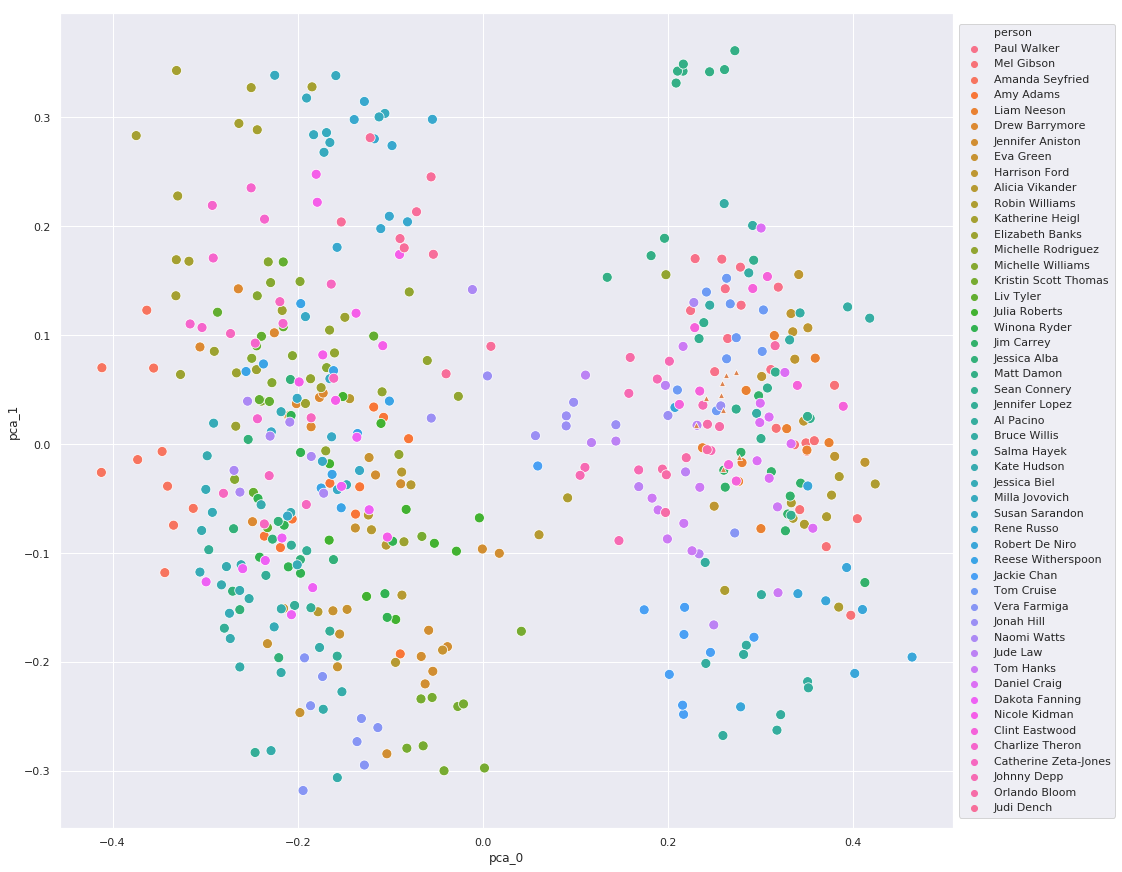

In [24]:
import matplotlib.pyplot as plt
import time
import random
 
# ysample = random.sample(xrange(-50, 50), 100)
 
# xdata = []
# ydata = []
 
# plt.show()

# sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=top_pca, x='pca_0', y='pca_1', hue='person', s=100)
 
# axes = plt.gca()
# axes.set_xlim(0, 100)
# axes.set_ylim(-50, +50)
ax = sns.scatterplot(data=webcam_pca,  x='pca_0', y='pca_1', marker='^')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# for i in range(100):
#     xdata.append(i)
#     ydata.append(ysample[i])
#     line.set_xdata(xdata)
#     line.set_ydata(ydata)
#     plt.draw()
#     plt.pause(1)
# time.sleep(0.1)

In [1]:
# import matplotlib.pyplot as plt
# import matplotlib.animation
# import seaborn as sns
# import numpy as np

# def get_data(i=0):
#     x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
#     return x,y

# x,y = get_data()
# g = sns.JointGrid(x=x, y=y, size=4)
# lim = (-10,10)

# def prep_axes(g, xlim, ylim):
#     g.ax_joint.clear()
#     g.ax_joint.set_xlim(xlim)
#     g.ax_joint.set_ylim(ylim)
#     g.ax_marg_x.clear()
#     g.ax_marg_x.set_xlim(xlim)
#     g.ax_marg_y.clear()
#     g.ax_marg_y.set_ylim(ylim)
#     plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
#     plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
#     plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
#     plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
#     plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
#     plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
#     plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
#     plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


# def animate(i):
#     g.x, g.y = get_data(i)
#     prep_axes(g, lim, lim)
#     g.plot_joint(sns.kdeplot, cmap="Purples_d")
#     g.plot_marginals(sns.kdeplot, color="m", shade=True)

# frames=np.sin(np.linspace(0,2*np.pi,17))*5
# ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)

# plt.show()

# sns.set(rc={'figure.figsize':(20,15)})
# ax = sns.scatterplot(data=top_pca, x='pca_0', y='pca_1', hue='person', s=100, style='test')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# webcam_length = webcam_pca.shape[0]

# def get_data(i=0):
#     x,y = x, y = webcam_pca.iloc[i % webcam_length, 1:]
#     return x,y

# def animate(i):
#     g.x, g.y = get_data(i)
#     prep_axes(g, lim, lim)
#     g.plot_joint(sns.kdeplot, cmap="Purples_d")
#     g.plot_marginals(sns.kdeplot, color="m", shade=True)


# plt.show()

Silhouette (clustering)

 - przetestowanie róznych embedingów czy któryś lepiej działa
 - lepsza selekcja zdjęć poszczególnych aktorów, żeby były lepiej separowalne w przestrzeni
 - różne sposoby uśredniania klatek z kamery

In [20]:
x, y = webcam_pca.iloc[1, 1:]

In [21]:
x, y

(0.2737584646703792, 0.06650830169465906)